In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn import linear_model

# **Data Loading**

In [ ]:
dataframe=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df=dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Data Visualization (EDA)**

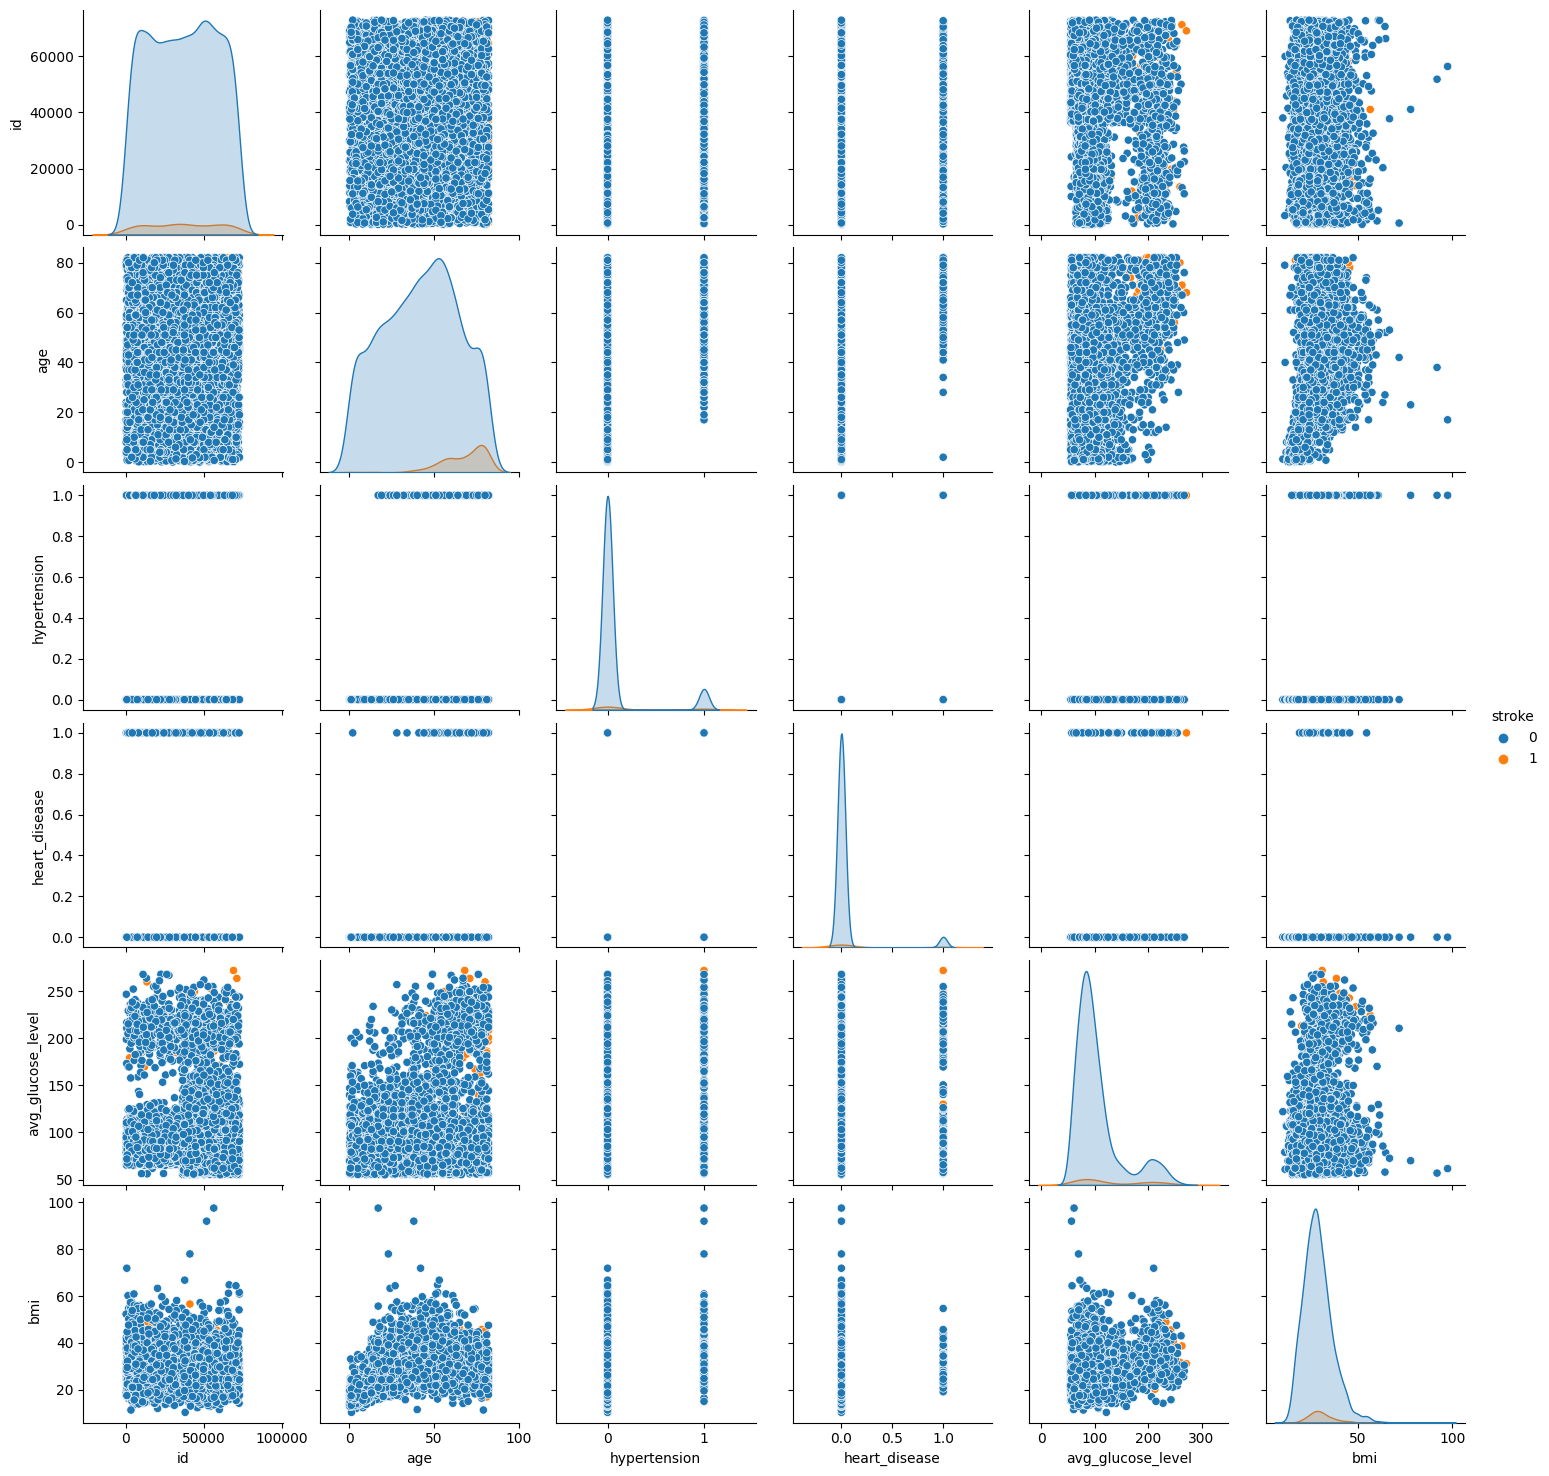

In [ ]:
sns.pairplot(df,hue='stroke')

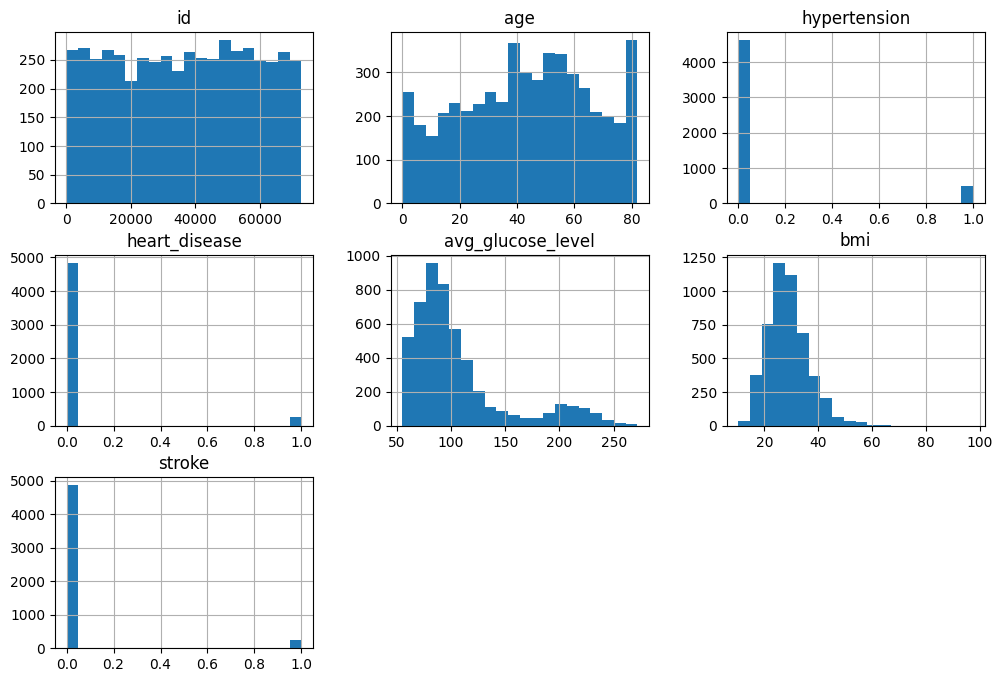

In [ ]:

df.hist(figsize=(12,8),bins=20)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **Data Preprocessing**

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_copy = df.copy()

In [ ]:
le = LabelEncoder()

df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])
df["work_type"] = le.fit_transform(df["work_type"])
df["smoking_status"] = le.fit_transform(df["smoking_status"])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df = df.drop("id",axis=1)

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
df=df[df['gender']!='Other']
x=df.gender.value_counts()
print(x)

0    2994
1    2115
2       1
Name: gender, dtype: int64


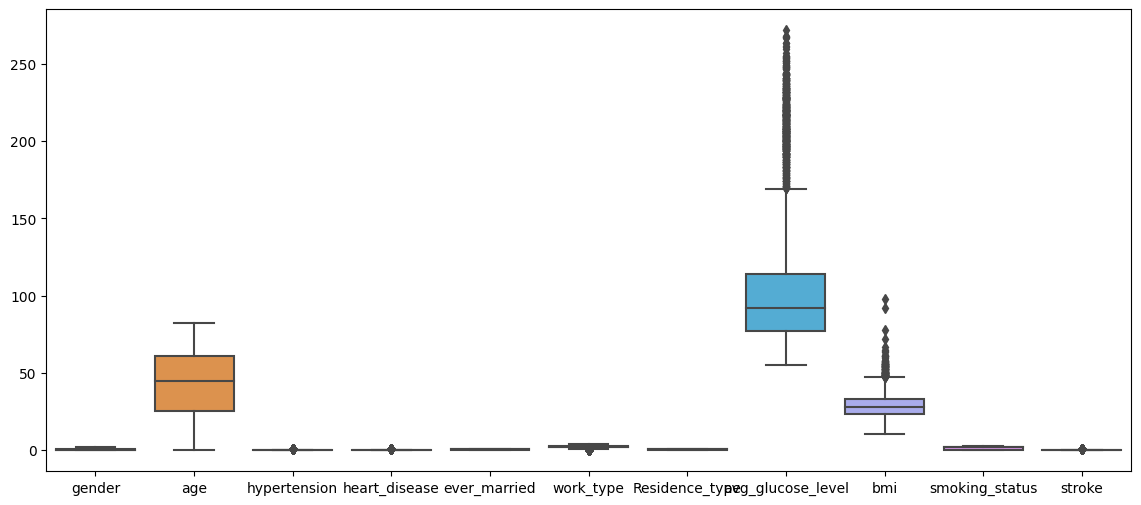

In [ ]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=df)
plt.show()

In [ ]:
median_bmi = df['bmi'].median()

In [ ]:
df['bmi'].fillna(median_bmi,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.1 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


Scaling Numerical Values to Standardized Form


In [ ]:
scaler = StandardScaler()

num_columns = ['age','avg_glucose_level','bmi']

df[num_columns] = scaler.fit_transform(df[num_columns])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1


# **Feature Engineering**

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.corr()['stroke']

gender               0.008929
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
work_type           -0.032316
Residence_type       0.015458
avg_glucose_level    0.131945
bmi                  0.036110
smoking_status       0.028123
stroke               1.000000
Name: stroke, dtype: float64

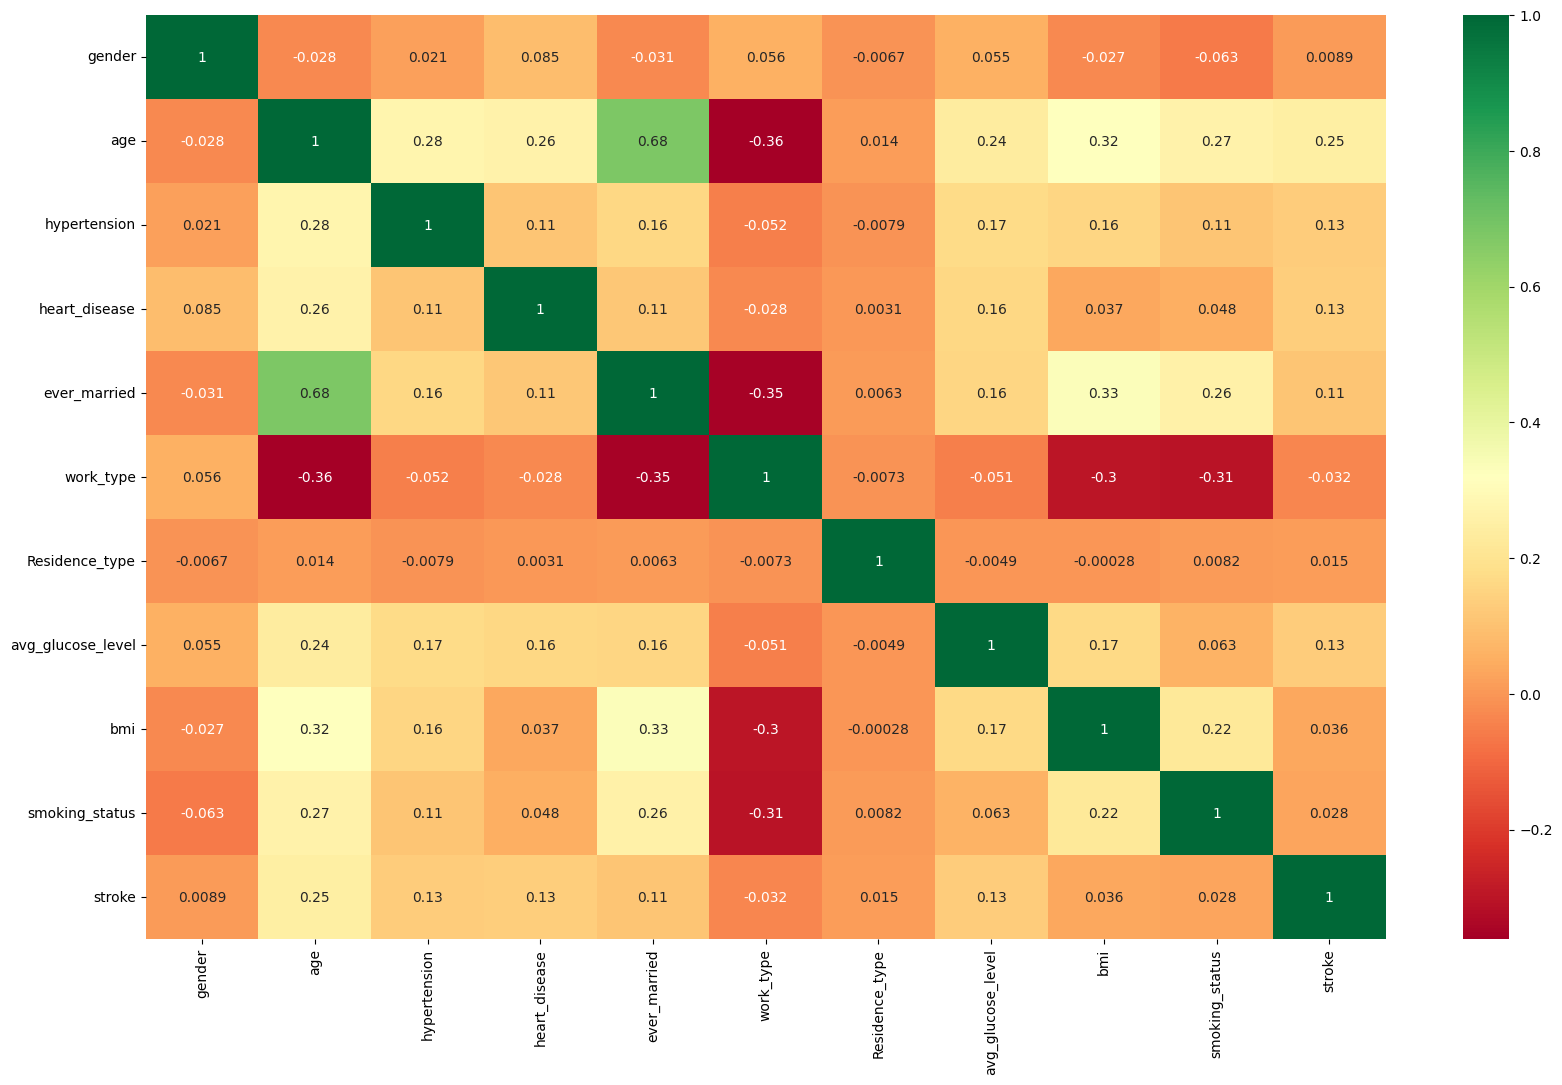

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


# **Select_K_Best**

In [ ]:
#Seperating dependent and independent variable
X = df.drop(['stroke'], axis = 1)
Y = df['stroke']

In [ ]:
#Selecting the Best features
test = SelectKBest(score_func= f_classif)
test.fit(X,Y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Col_name','Score']
print(featureScores.nlargest(11,'Score'))

            Col_name       Score
1                age  326.916568
3      heart_disease   94.698406
7  avg_glucose_level   90.503870
2       hypertension   84.953542
4       ever_married   60.667230
8                bmi    6.669168
5          work_type    5.340019
9     smoking_status    4.043033
6     Residence_type    1.220842
0             gender    0.407266


# **K-Nearest Neighbour**

In [ ]:
#Seperating dependent and independent variable
#Dropping Less important columns
X = df.drop(['stroke','gender','Residence_type','smoking_status','work_type','bmi','ever_married','hypertension'], axis = 1)
Y = df['stroke']

scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)


In [ ]:
#Determining appropriate value of K

knn_scores = []
for k in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

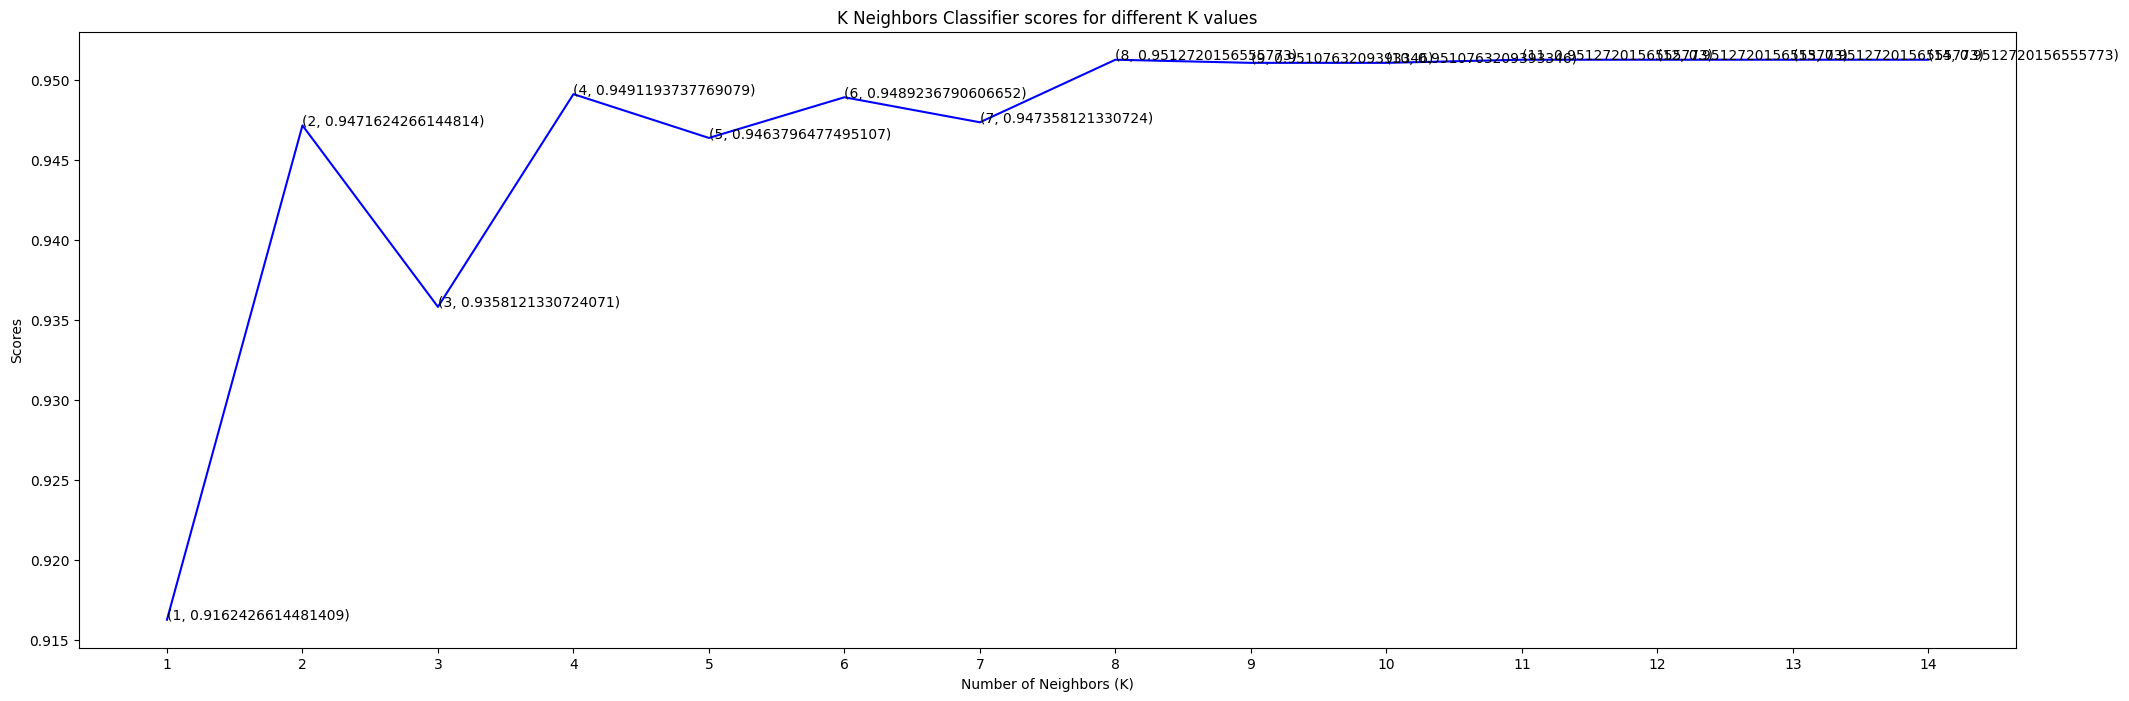

In [ ]:
#Plotting different accuracies for different values of K

plt.figure(figsize=(25, 8))

plt.plot([k for k in range(1, 15)], knn_scores, color = 'blue')

for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X,Y,cv=10)
score

array([0.95107632, 0.94911937, 0.95107632, 0.95303327, 0.95107632,
       0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95303327])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1204
           1       0.00      0.00      0.00        74

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278



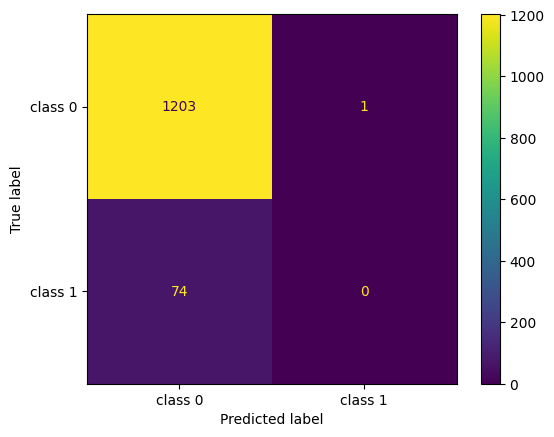

0.9413145539906104

In [ ]:

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, knn_classifier.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show()

knn_accuracy


# **Decision Tree**

Train data accuracy: 1.0
Test data accuracy: 0.9092331768388107
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1204
           1       0.17      0.15      0.16        74

    accuracy                           0.91      1278
   macro avg       0.56      0.55      0.56      1278
weighted avg       0.90      0.91      0.91      1278



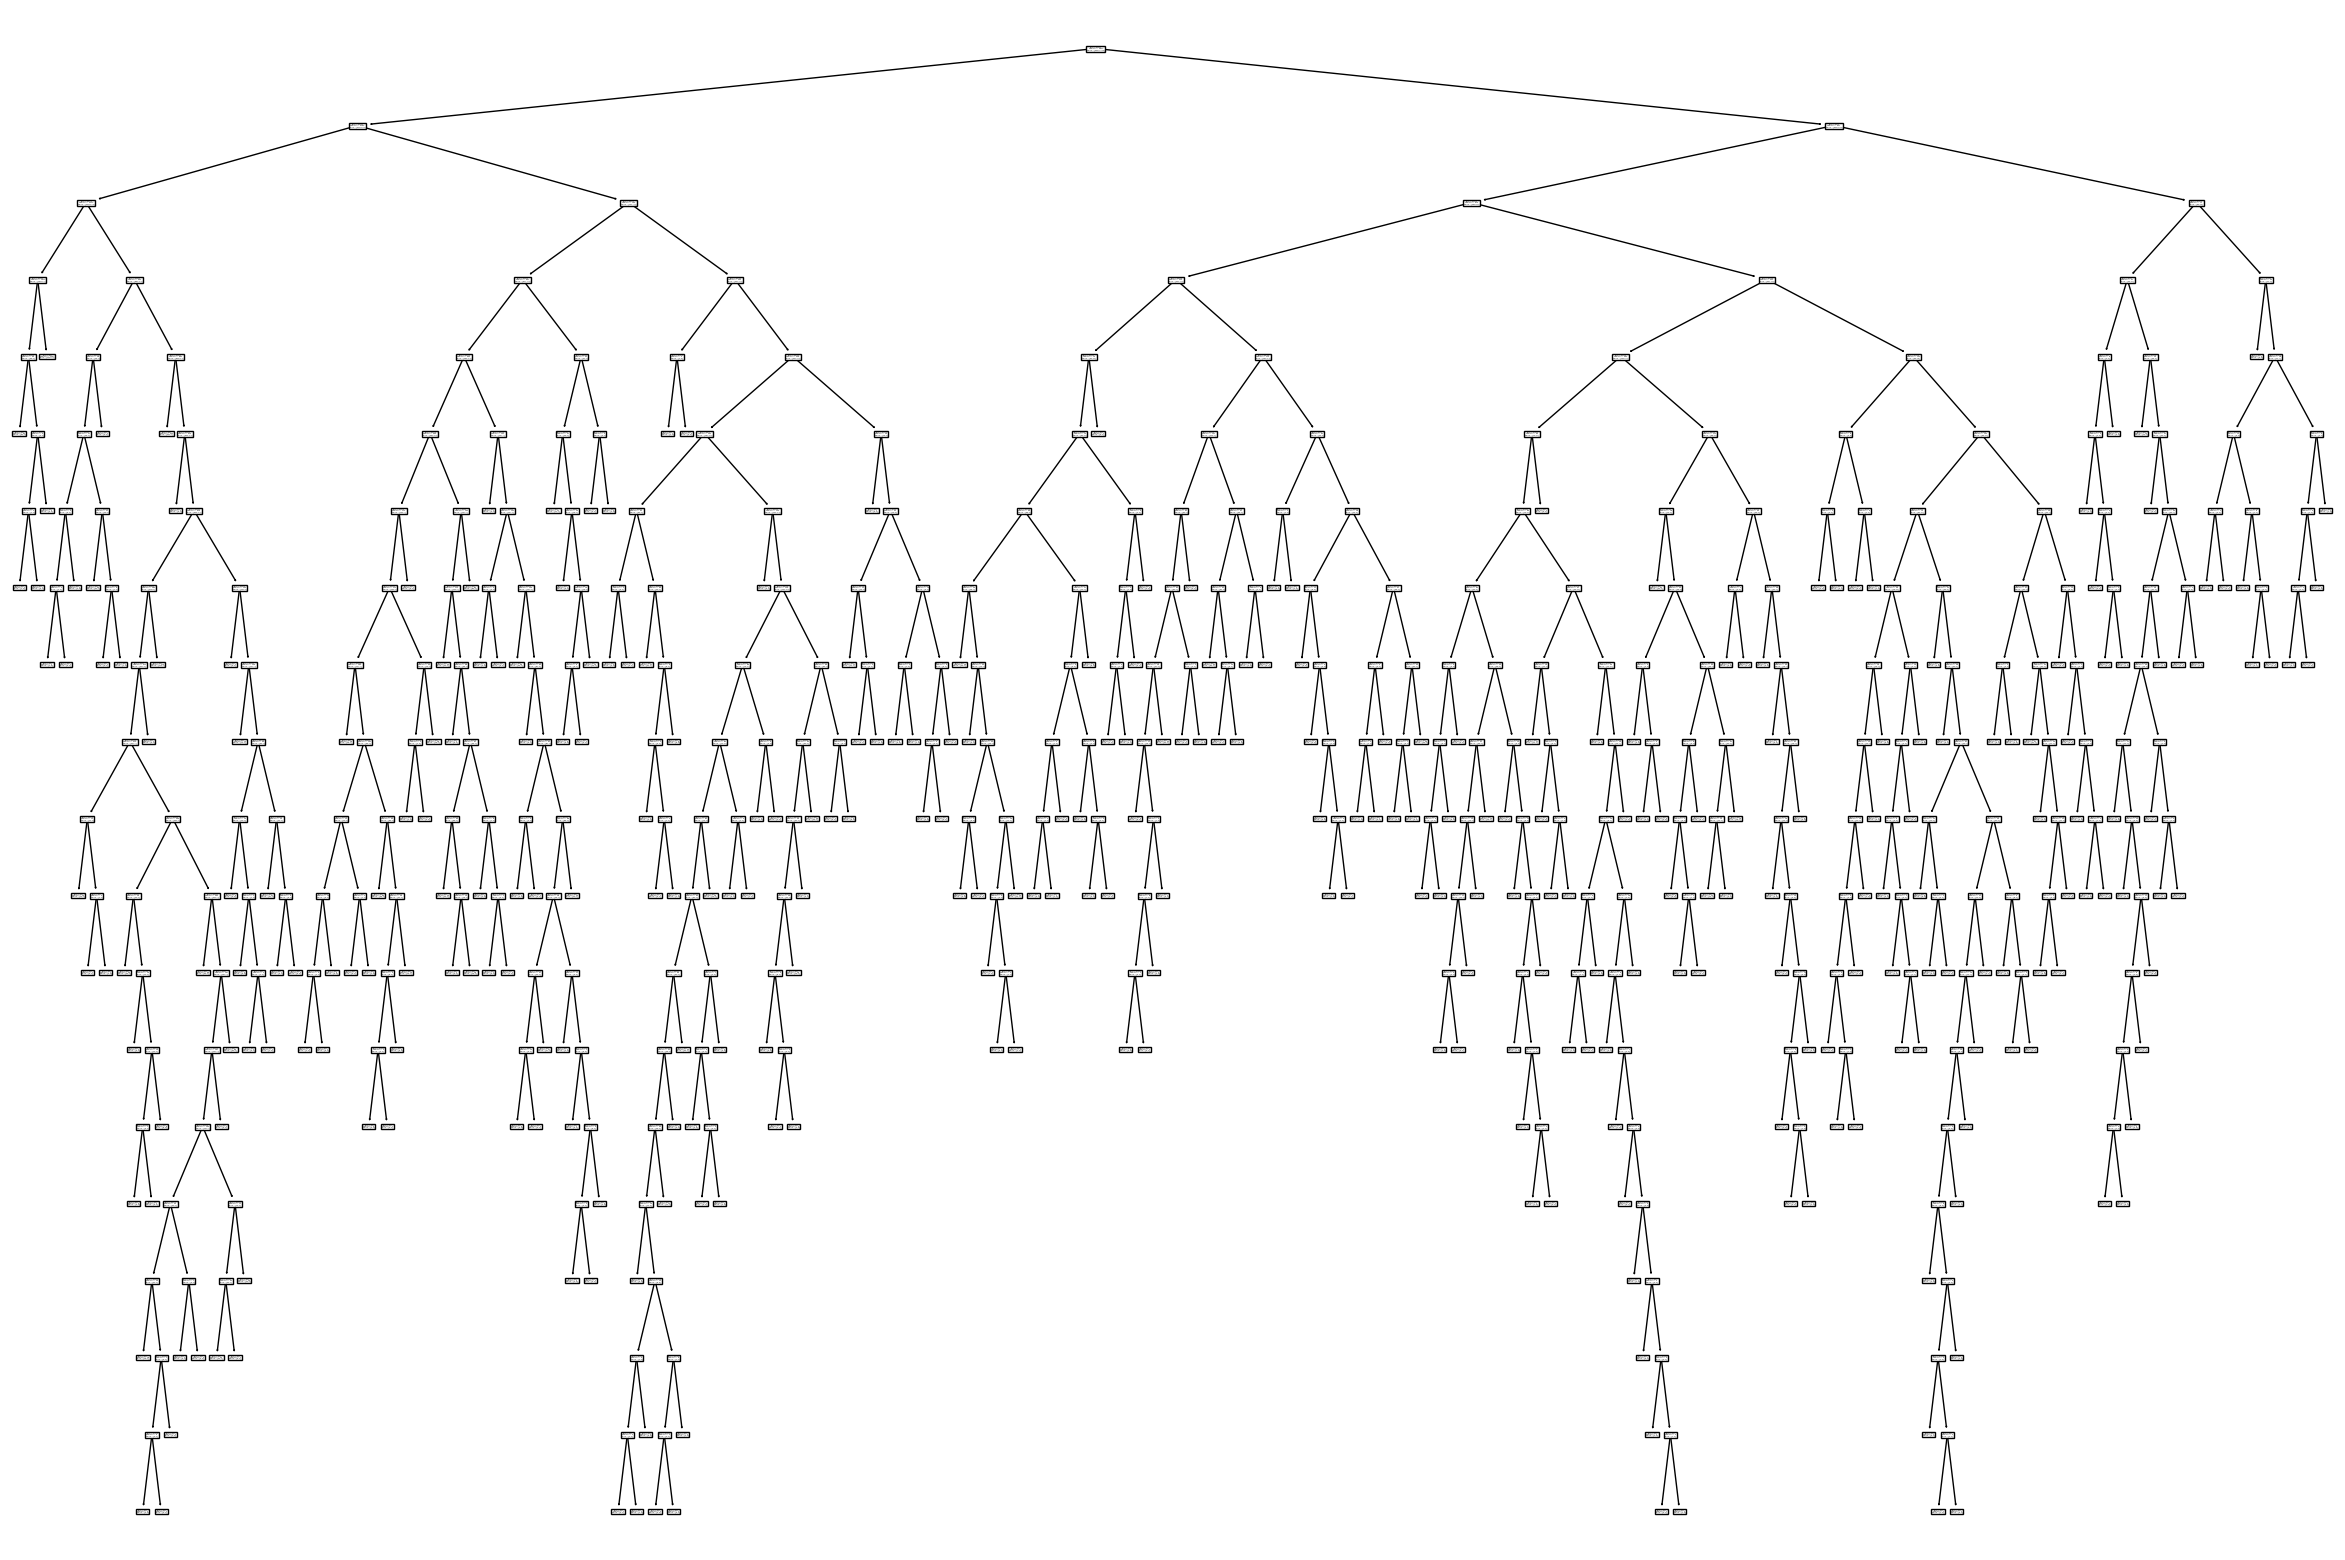

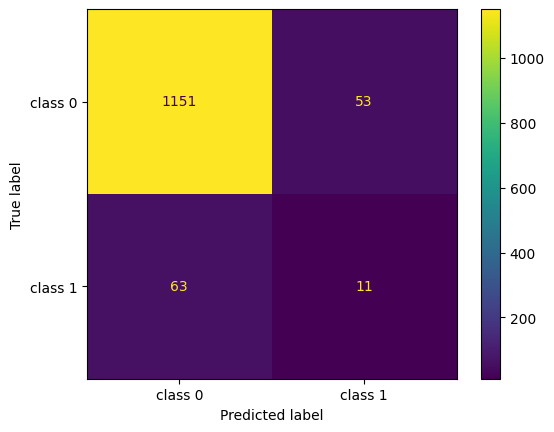

In [ ]:
df = pd.DataFrame(X)
features= df.columns
cn= pd.DataFrame([0,1,2])


#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show()

dt_accuracy = accuracy_score(y_test, y_pred)

# **Random_Forest**

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1204
           1       0.17      0.15      0.16        74

    accuracy                           0.91      1278
   macro avg       0.56      0.55      0.56      1278
weighted avg       0.90      0.91      0.91      1278



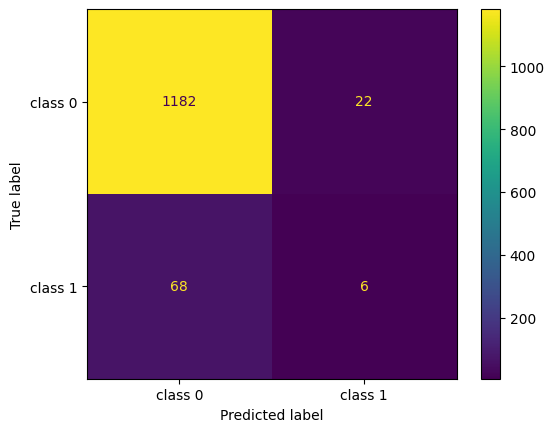

0.9092331768388107

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)

c1=classification_report(y_test, dtree.predict(X_test))
print(c1)

rf_accuracy = accuracy_score(y_test, y_pred)

confusion_matrix = metrics.confusion_matrix(y_test, random_forest.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show()
rf_accuracy

# **SVM**

In [ ]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

0.9420970266040689


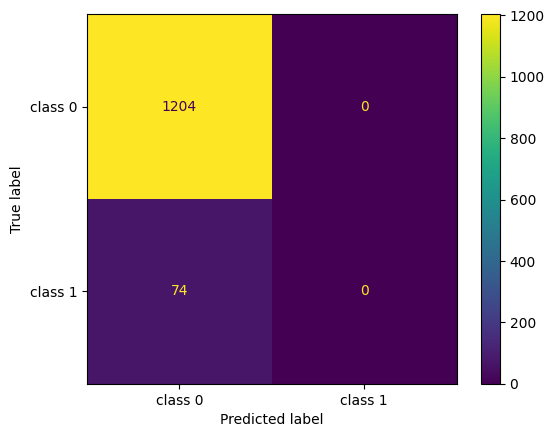

In [ ]:
y_pred = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy
confusion_matrix = metrics.confusion_matrix(y_test, model_svm.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show()

In [ ]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1204
           1       0.00      0.00      0.00        74

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.91      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Logistic_Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train data accuracy: 0.9543319415448852
Test data accuracy: 0.9420970266040689
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1204
           1       0.00      0.00      0.00        74

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.91      1278



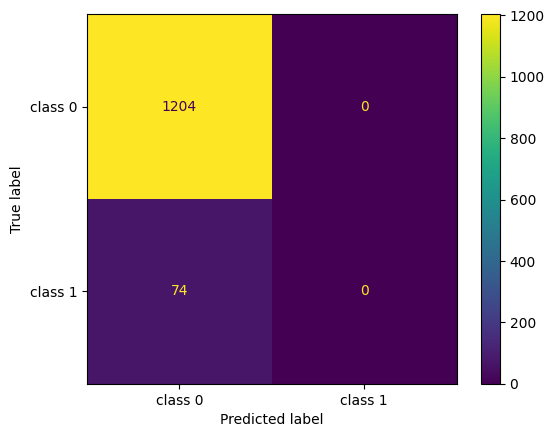

0.9420970266040689

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))

login_accuracy = accuracy_score(y_test, y_pred)

c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show()
login_accuracy

In [ ]:

acc_list = {'KNN':knn_accuracy,
'Decision_Tree': dt_accuracy,
'Random_Forest': rf_accuracy,
'S_V_M': svm_accuracy,
'Logistic_Regression': login_accuracy}

acc_list

acc_df = pd.DataFrame.from_dict(acc_list, orient='index', columns=['Accuracy_Score'])
acc_df_sorted = acc_df.sort_values(by='Accuracy_Score', ascending=False)
acc_df_sorted


,Accuracy_Score
S_V_M,0.942097
Logistic_Regression,0.942097
KNN,0.941315
Decision_Tree,0.909233
Random_Forest,0.909233
